# Лабораторная работа 1
## Персептрон

In [978]:
import numpy as np
import matplotlib.pyplot as plt

## Класс персептрона для классификации на 2 класса

In [1001]:
class Perceptron:

    def __init__(self, in_size, learning_rate):
        self.w = np.random.randn(in_size + 1) / np.sqrt(in_size)
        self.learning_rate = learning_rate

    def loss(self, x):
        return 1 if x > 0 else 0

    def fit(self, X, y, epochs=10):
        X = np.c_[X, np.ones((X.shape[0]))]
        for epoch in np.arange(0, epochs):
            for (x, target) in zip(X, y):
                p = self.loss(np.dot(x, self.w))
                if p != target:
                    error = (p - target)
                    self.w -= self.learning_rate * error * x
            print(f'Epoch: {epoch+1}, error: {error}, weights: {self.w}')

    def predict(self, X):
        X = np.atleast_2d(X)
        X = np.c_[X, np.ones((X.shape[0]))]
        return self.loss(np.dot(X, self.w))

    def get_weights(self):
        return self.w

## Обучающая выборка 1

In [1002]:
points1 = np.array([
    [4.7, 3.6],
    [-4.2, -1.4],
    [-1.4, 1.8],
    [0.9, 2.8],
    [-1.4, -3],
    [-4.2, 2.7],
], dtype=np.float64)
labels1 = np.array([0, 1, 1, 1, 1, 1], dtype=np.int32)

In [1003]:
perceptron = Perceptron(2, 0.1)
perceptron.fit(points1, labels1)

weights = perceptron.get_weights()

Epoch: 1, error: 1, weights: [-0.30465275  0.26805323  0.92239241]
Epoch: 2, error: -1, weights: [-0.68465275  0.18805323  0.92239241]
Epoch: 3, error: -1, weights: [-0.68465275  0.18805323  0.92239241]
Epoch: 4, error: -1, weights: [-0.68465275  0.18805323  0.92239241]
Epoch: 5, error: -1, weights: [-0.68465275  0.18805323  0.92239241]
Epoch: 6, error: -1, weights: [-0.68465275  0.18805323  0.92239241]
Epoch: 7, error: -1, weights: [-0.68465275  0.18805323  0.92239241]
Epoch: 8, error: -1, weights: [-0.68465275  0.18805323  0.92239241]
Epoch: 9, error: -1, weights: [-0.68465275  0.18805323  0.92239241]
Epoch: 10, error: -1, weights: [-0.68465275  0.18805323  0.92239241]


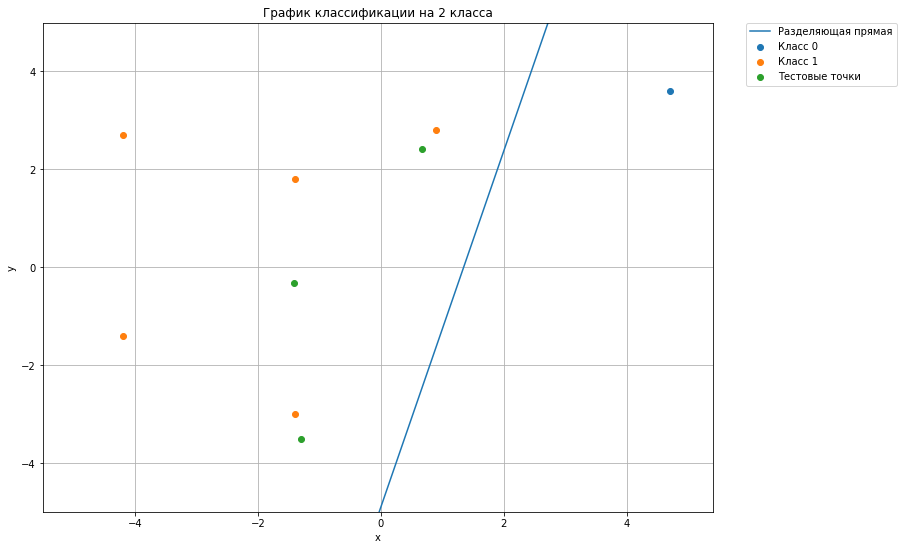

In [1004]:
x = np.arange(-5, 5, 0.1)
y = np.apply_along_axis(lambda t: (-weights[2] - t * weights[0]) / weights[1], 0, x)

x_c1 = points1[labels1 == 0, 0]
y_c1 = points1[labels1 == 0, 1]

x_c2 = points1[labels1 == 1, 0]
y_c2 = points1[labels1 == 1, 1]

test_points1 = np.random.randn(3, 2) * 2

plt.figure(figsize=(12, 9))
plt.ylim(-5, 5)
plt.title('График классификации на 2 класса')
line = plt.plot(x, y, label='Разделяющая прямая')
c1 = plt.scatter(x_c1, y_c1, label='Класс 0')
c2 = plt.scatter(x_c2, y_c2, label='Класс 1')
test = plt.scatter(test_points1[:,0], test_points1[:,1], label='Тестовые точки')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Предсказание для сгенерированных точек

In [983]:
for test_point in test_points1:
    print(f'Point: {test_point} Predict class: {perceptron.predict(test_point)}')

Point: [-1.33500985 -0.42233552] Predict class: 1
Point: [3.4167417  0.11553175] Predict class: 0
Point: [-1.53051761  1.25507008] Predict class: 1


### Добавление точки для получения двух линейно неразделимых множеств

In [984]:
points1 = np.concatenate([points1, np.array([[-2, 2.5]])])
labels1 = np.concatenate([labels1, np.array([0])])

In [1000]:
perceptron = Perceptron(2, 0.1)
perceptron.fit(points1, labels1)

weights = perceptron.get_weights()

x = np.arange(-5, 5, 0.1)
y = np.apply_along_axis(lambda t: (-weights[2] - t * weights[0]) / weights[1], 0, x)

x_c1 = points1[labels1 == 0, 0]
y_c1 = points1[labels1 == 0, 1]

x_c2 = points1[labels1 == 1, 0]
y_c2 = points1[labels1 == 1, 1]

plt.figure(figsize=(12, 9))
plt.ylim(-5, 5)
plt.title('График классификации на 2 класса при линейно неразделимых множествах')
plt.plot(x, y, label='Разделяющая прямая')
plt.scatter(x_c1, y_c1, label='Класс 0')
plt.scatter(x_c2, y_c2, label='Класс 1')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

TypeError: __init__() missing 1 required positional argument: 'learning_rate'

Как видно из графика, после добавления дополнительной точки, множества стали линейно неразделимы и поэтому персептрон, не смог разделить точки на 2 класса

## Класс персептрона для классификации на 4 класса

In [986]:
class Perceptron:

    def __init__(self, in_size, out_size, learning_rate):
        self.w = np.random.randn(out_size, in_size + 1) / np.sqrt(in_size)
        self.learning_rate = learning_rate

    def loss(self, x):
        return np.vectorize(lambda t: 1 if t > 0 else 0)(x)

    def fit(self, X, y, epochs=10):
        X = np.c_[X, np.ones((X.shape[0]))]
        for epoch in np.arange(0, epochs):
            for (x, target) in zip(X, y):
                p = self.loss(np.dot(x, self.w.T))
                if not np.array_equal(p, target):
                    error = np.reshape(p - target, (2, 1))
                    self.w -= self.learning_rate * error * x
            print(f'Epoch: {epoch+1}, error: {error.T}, weights: {self.w}')

    def predict(self, X):
        X = np.atleast_2d(X)
        X = np.c_[X, np.ones((X.shape[0]))]
        return self.loss(np.dot(X, self.w.T))

    def get_weights(self):
        return self.w

In [996]:
points2 = np.array([
    [-2.7, -3.9],
    [1, -0.5],
    [-0.5, 1.6],
    [2.7, -1.5],
    [1.6, -0.9],
    [3.4, 3.3],
    [-2.5, 1.1],
    [0.8, 0.4]
], dtype=np.float64)
labels2 = np.array([
    [1, 1],
    [0, 0],
    [1, 0],
    [0, 0],
    [0, 0],
    [0, 0],
    [1, 1],
    [0, 0]
], dtype=np.int32)

In [997]:
perceptron = Perceptron(2, 2, 0.1)
perceptron.fit(points2, labels2)
weights = perceptron.get_weights()


Epoch: 1, error: [[-1  0]], weights: [[-0.85588567 -0.31851612 -1.09648831]
 [-0.58024899  0.41551593  0.10798158]]
Epoch: 2, error: [[-1  1]], weights: [[-0.90588567 -0.15851612 -0.99648831]
 [-0.53024899  0.25551593  0.00798158]]
Epoch: 3, error: [[-1  1]], weights: [[-0.95588567  0.00148388 -0.89648831]
 [-0.48024899  0.09551593 -0.09201842]]
Epoch: 4, error: [[-1  1]], weights: [[-1.00588567  0.16148388 -0.79648831]
 [-0.43024899 -0.06448407 -0.19201842]]
Epoch: 5, error: [[-1  0]], weights: [[-1.05588567  0.32148388 -0.69648831]
 [-0.43024899 -0.06448407 -0.19201842]]
Epoch: 6, error: [[-1  0]], weights: [[-1.05588567  0.32148388 -0.69648831]
 [-0.43024899 -0.06448407 -0.19201842]]
Epoch: 7, error: [[-1  0]], weights: [[-1.05588567  0.32148388 -0.69648831]
 [-0.43024899 -0.06448407 -0.19201842]]
Epoch: 8, error: [[-1  0]], weights: [[-1.05588567  0.32148388 -0.69648831]
 [-0.43024899 -0.06448407 -0.19201842]]
Epoch: 9, error: [[-1  0]], weights: [[-1.05588567  0.32148388 -0.696488

In [998]:
def partition_on_class(points, labels, mask):
    res = []
    for i in np.arange(points.shape[0]):
        if np.array_equal(labels[i], mask):
            res.append(points[i])
    return np.array(res)

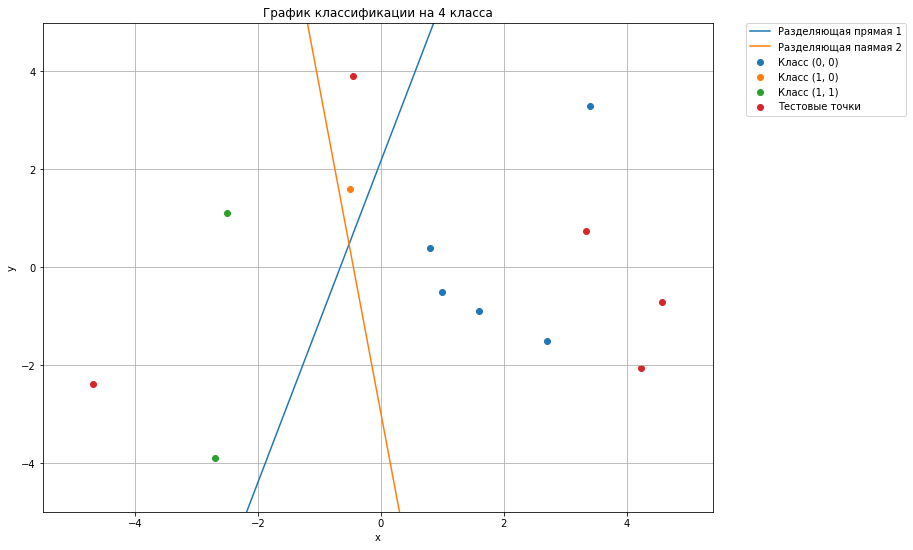

In [999]:
x = np.arange(-5, 5, 0.1)

y1 = np.vectorize(lambda t: (-weights[0][2] - t * weights[0][0]) / weights[0][1])(x)
y2 = np.vectorize(lambda t: (-weights[1][2] - t * weights[1][0]) / weights[1][1])(x)

points_c1 = partition_on_class(points2, labels2, [0, 0])
points_c2 = partition_on_class(points2, labels2, [0, 1])
points_c3 = partition_on_class(points2, labels2, [1, 0])
points_c4 = partition_on_class(points2, labels2, [1, 1])

test_points2 = np.random.randn(5, 2) * 3

plt.figure(figsize=(12, 9))
plt.ylim(-5, 5)
plt.title('График классификации на 4 класса')
plt.plot(x, y1, label='Разделяющая прямая 1')
plt.plot(x, y2, label='Разделяющая паямая 2')
plt.scatter(points_c1[:,0], points_c1[:,1], label='Класс (0, 0)')
plt.scatter(points_c3[:,0], points_c3[:,1], label='Класс (1, 0)')
plt.scatter(points_c4[:,0], points_c4[:,1], label='Класс (1, 1)')
plt.scatter(test_points2[:,0], test_points2[:,1], label='Тестовые точки')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Предсказание для сгенерированных точек

In [991]:
for test_point in test_points2:
    print(f'Point: {test_point} Predict class: {perceptron.predict(test_point)}')

Point: [-0.98441251 -1.71782616] Predict class: [[1 1]]
Point: [-0.9664006  -1.21512403] Predict class: [[1 1]]
Point: [-7.45454732 -0.68411359] Predict class: [[1 1]]
Point: [1.47097375 2.85258495] Predict class: [[0 0]]
Point: [-0.39404034 -4.99372643] Predict class: [[1 1]]


In [992]:
a = np.array([1, 4, 7])
print(a)
print(np.atleast_2d(a))

[1 4 7]
[[1 4 7]]
